In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
import os
from scipy.stats import skewnorm

In [2]:
# Load cleaned data.
df = pd.read_pickle('data/cleaned_data')
print(df.head())

   accountNumber  customerId  creditLimit  availableMoney  \
0      737265056   737265056         5000          5000.0   
1      737265056   737265056         5000          5000.0   
2      737265056   737265056         5000          5000.0   
3      737265056   737265056         5000          5000.0   
4      830329091   830329091         5000          5000.0   

   transactionDateTime  transactionAmount         merchantName acqCountry  \
0  2016-08-13T14:27:32              98.55                 Uber         US   
1  2016-10-11T05:05:54              74.51          AMC #191138         US   
2  2016-11-08T09:18:39               7.47           Play Store         US   
3  2016-12-10T02:14:50               7.47           Play Store         US   
4  2016-03-24T21:04:46              71.18  Tim Hortons #947751         US   

  merchantCountryCode posEntryMode  ... accountOpenDate  \
0                  US           02  ...      2015-03-14   
1                  US           09  ...      2015-03

In [3]:
# Identify columns of numerical and categorical columns of interest.
int_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

In [4]:
# Look at summary statistics for each numerical column.
df[int_cols].describe()  

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


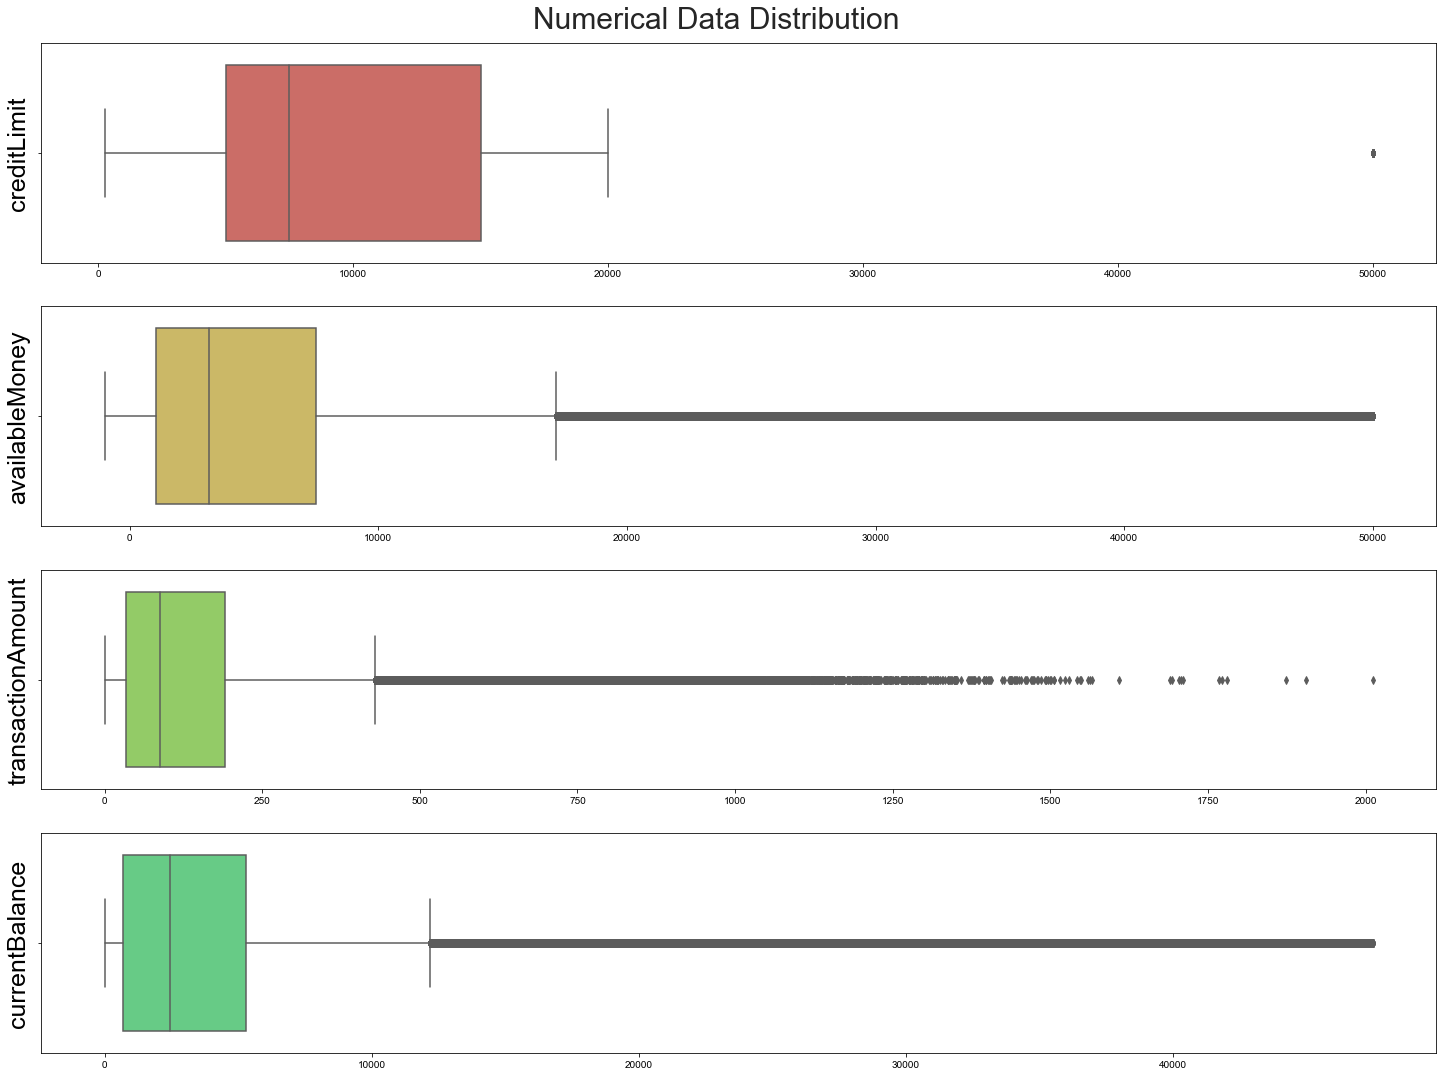

In [5]:
fig, ax = plt.subplots(nrows=4, figsize=(25,17))
color_pal = sns.color_palette("hls", 8)
sns.set(style="darkgrid")
for col in range(len(int_cols)):
    sns.boxplot(data=df, x=int_cols[col], ax=ax[col], color=color_pal[col])
    ax[col].set_ylabel(int_cols[col], fontsize=25)
    ax[col].set_xlabel('')
plt.suptitle('Numerical Data Distribution', fontsize=30)
fig.subplots_adjust(top=0.95)

/Users/miao.zheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miao.zheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miao.zheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

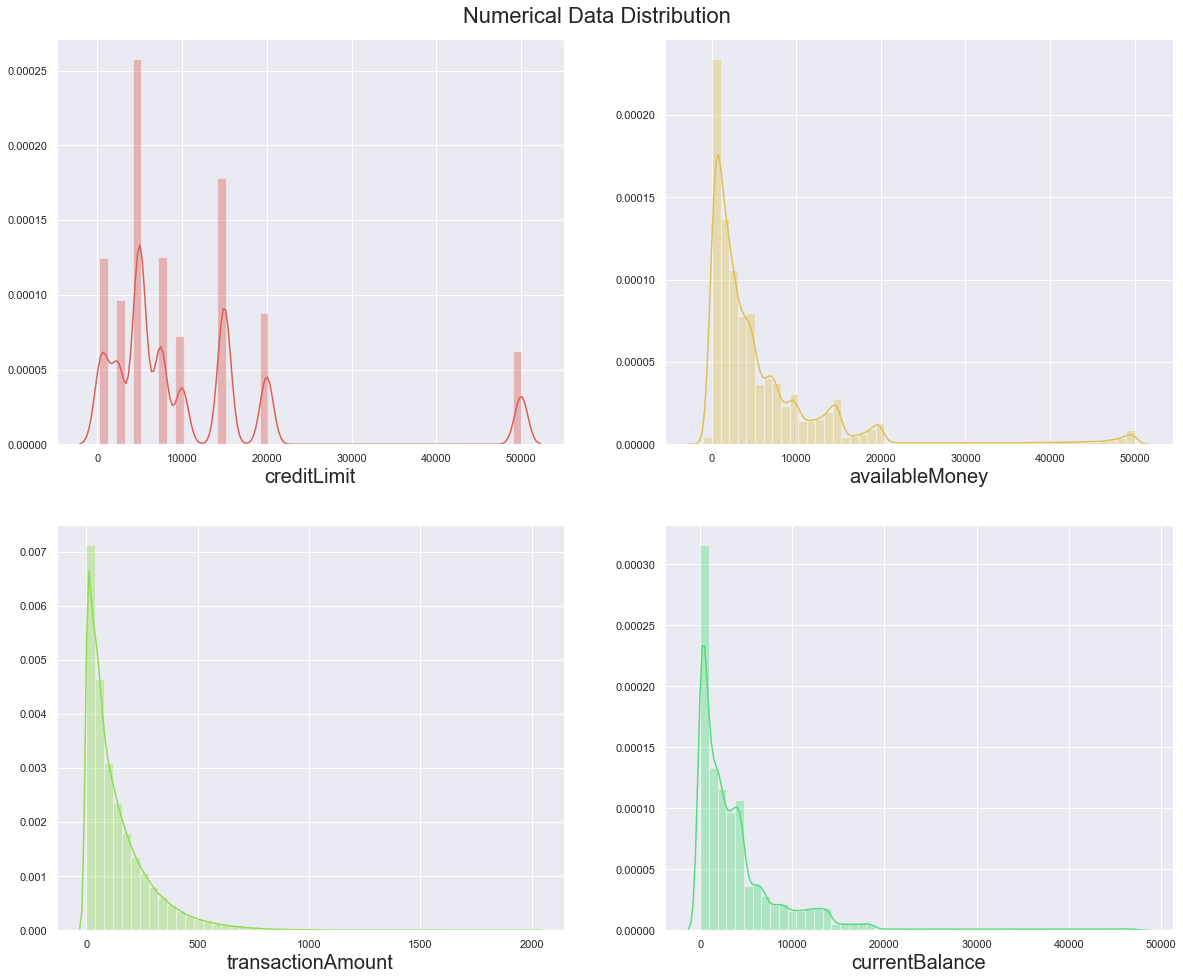

In [6]:
# Graph distribution plots of numerical columns.

fig, ax = plt.subplots(ncols=2, nrows=2,figsize=(20,15))
cnt = 0
for i in range(2):
    for j in range(2):
        sns.distplot(df[int_cols[cnt]], ax=ax[i][j], color=color_pal[cnt])
        ax[i][j].set_xlabel(int_cols[cnt], fontsize=20)
        ax[i][j].set_ylabel('')
        cnt+=1

fig.suptitle('Numerical Data Distribution', fontsize=22)
fig.subplots_adjust(top=0.95)

/Users/miao.zheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Transaction Amounts')

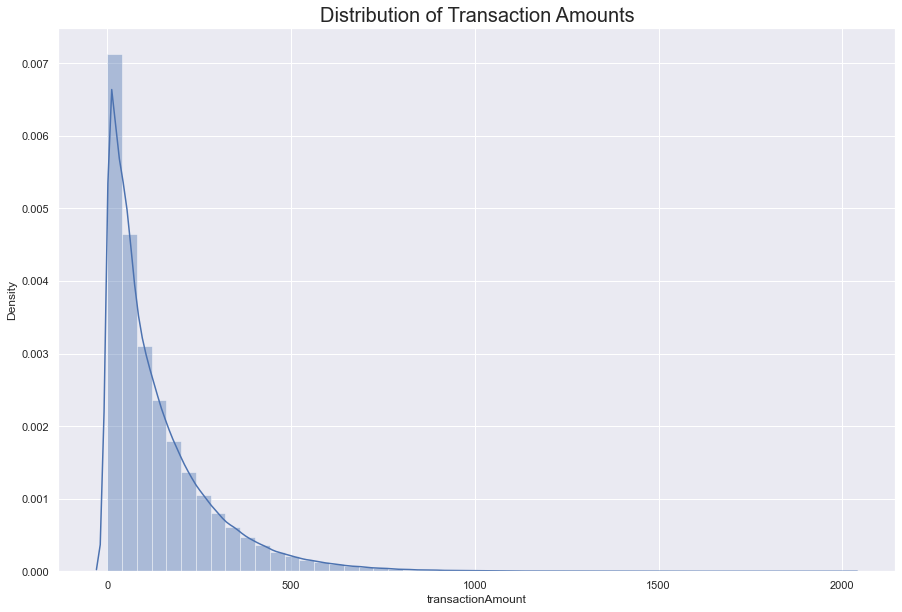

In [7]:
# Plot histogram for transactionAmount.
plt.figure(figsize=(15, 10))
sns.distplot(df['transactionAmount'])
plt.title('Distribution of Transaction Amounts', fontsize=20)


In [8]:
# Look at the correlation amoung numerical columns using Pearson's correlation.
df[int_cols].corr(method ='pearson')

,creditLimit,availableMoney,transactionAmount,currentBalance
creditLimit,1.000000,0.834977,0.005581,0.653652
availableMoney,0.834977,1.000000,-0.010070,0.129332
transactionAmount,0.005581,-0.010070,1.000000,0.023905
currentBalance,0.653652,0.129332,0.023905,1.000000


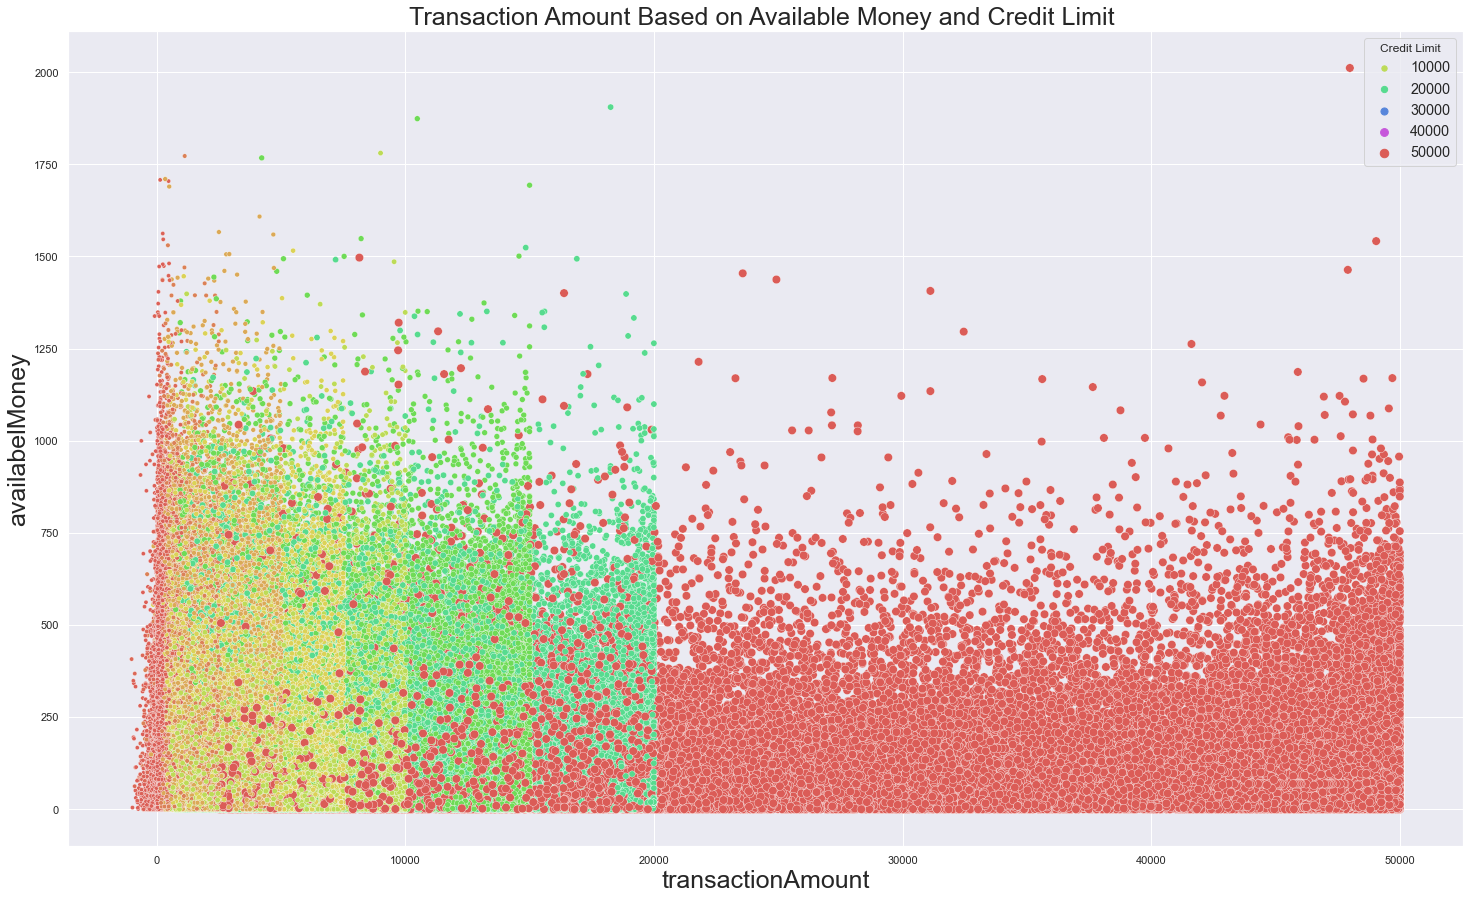

In [9]:
# Look at correlation between available Money, transaction amount, and credit limit.
plt.figure(figsize=(25, 15))
sns.scatterplot(data=df, x="availableMoney", y="transactionAmount", hue="creditLimit", size="creditLimit", palette="hls")
plt.title('Transaction Amount Based on Available Money and Credit Limit ', fontsize=25)
plt.legend(title='Credit Limit', fontsize='large')
plt.xlabel('transactionAmount', fontsize=25)
plt.ylabel('availabelMoney', fontsize=25)
plt.show()

Text(0.5, 1.0, 'Correlation of Numerical Variables')

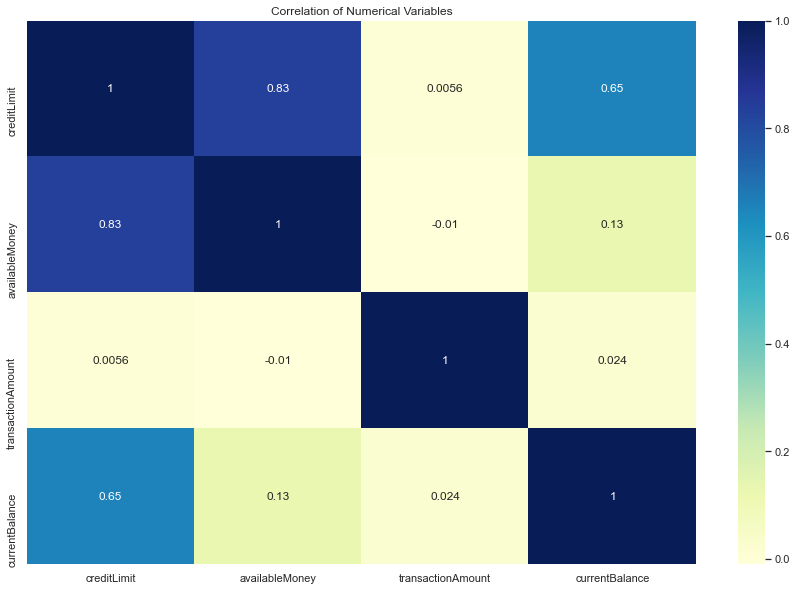

In [10]:
# Plot heatmap showing the Pearson's correlation. 
plt.figure(figsize=(15, 10))
sns.heatmap(df[int_cols].corr(method ='pearson'), cmap="YlGnBu", annot=True)
plt.title("Correlation of Numerical Variables")

In [11]:
# List categorical columns of interest.
cat_cols = ['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'transactionType', 'cardPresent',\
            'expirationDateKeyInMatch', 'isFraud']
# Look at unique values for categorical columns.
print(df[cat_cols].nunique())

merchantName                2490
acqCountry                     4
merchantCountryCode            4
posEntryMode                   5
transactionType                3
cardPresent                    2
expirationDateKeyInMatch       2
isFraud                        2
dtype: int64


False    773946
True      12417
Name: isFraud, dtype: int64


Text(0, 0.5, 'Number of Transactons')

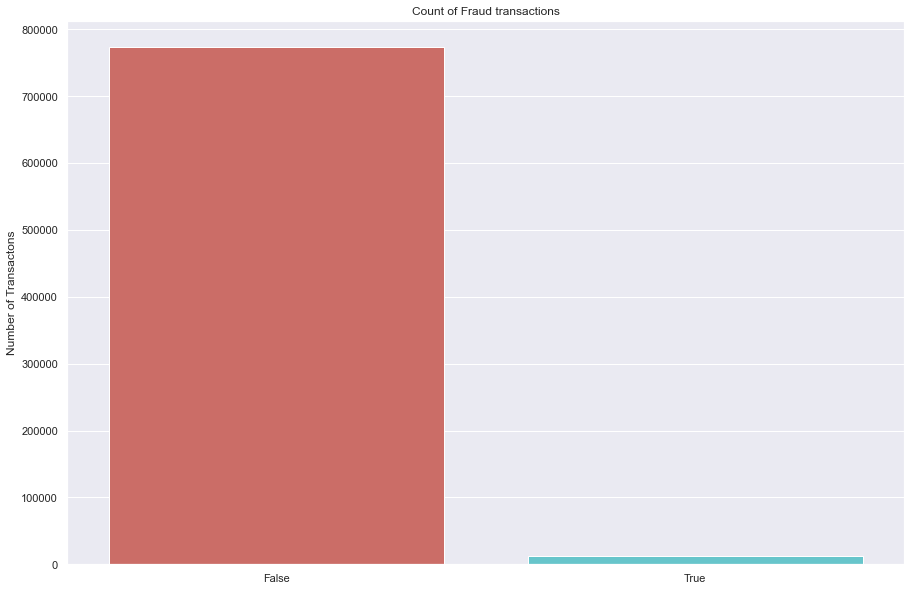

In [12]:
# Look at the number of transactions marked as Fraud
plt.figure(figsize=(15, 10))
fraud_cnt = df['isFraud'].value_counts()
print(fraud_cnt)
sns.barplot(x=[0,1], y=fraud_cnt, palette="hls")
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.title('Count of Fraud transactions')
plt.ylabel('Number of Transactons')

Text(0.5, 1.0, 'Accounts with the most Fraudulent Transactions')

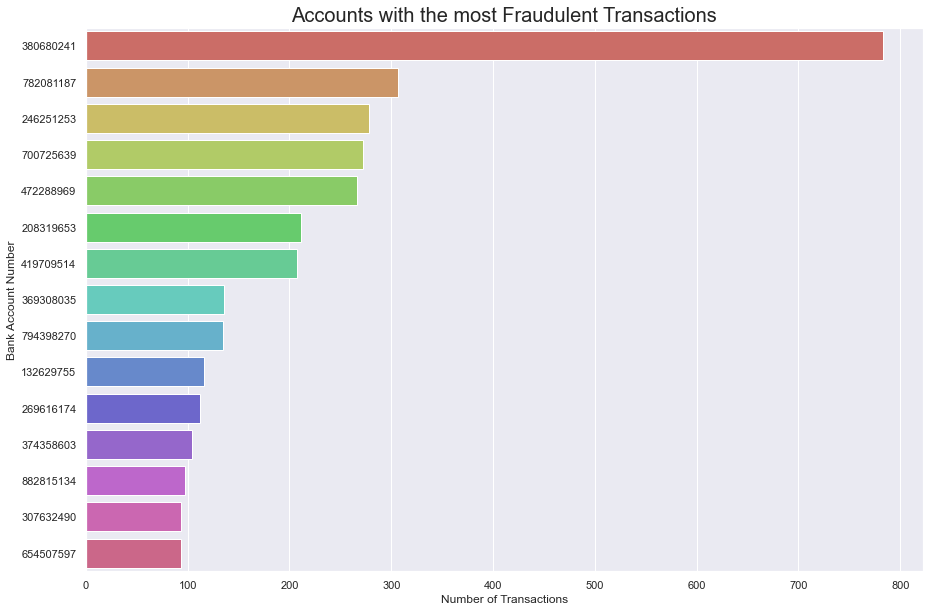

In [13]:
# Look at accounts with the most fraudulent transactions.
plt.figure(figsize=(15, 10))
fraud_trans=df[df['isFraud'] == True]
fraud_acct = fraud_trans['accountNumber'].value_counts().head(15)
sns.barplot(y=list(range(15)), x=fraud_acct.values, orient='h', palette='hls')
plt.yticks(ticks=list(range(15)), labels=fraud_acct.index.tolist())
plt.ylabel('Bank Account Number')
plt.xlabel('Number of Transactions')
plt.title('Accounts with the most Fraudulent Transactions', fontsize = 20)

Text(0.5, 1.0, 'Merchants with the most Fraudulent Transactions')

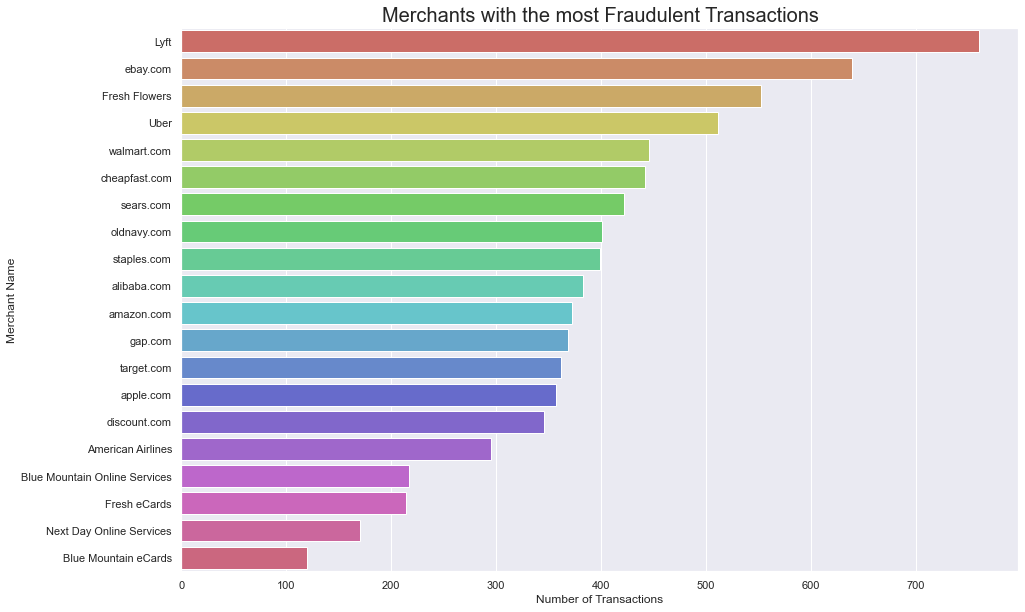

In [14]:
# Look at mercahnts with the most fraudulent transactions.
plt.figure(figsize=(15, 10))
fraud_mer = fraud_trans['merchantName'].value_counts().head(20)
sns.barplot(y=list(range(20)), x=fraud_mer.values, orient='h', palette='hls')
plt.yticks(ticks=list(range(20)), labels=fraud_mer.index.tolist())
plt.ylabel('Merchant Name')
plt.xlabel('Number of Transactions')
plt.title('Merchants with the most Fraudulent Transactions', fontsize = 20)

Text(0.5, 1.0, 'Merchant Country with the Most Fraudulent Transactions')

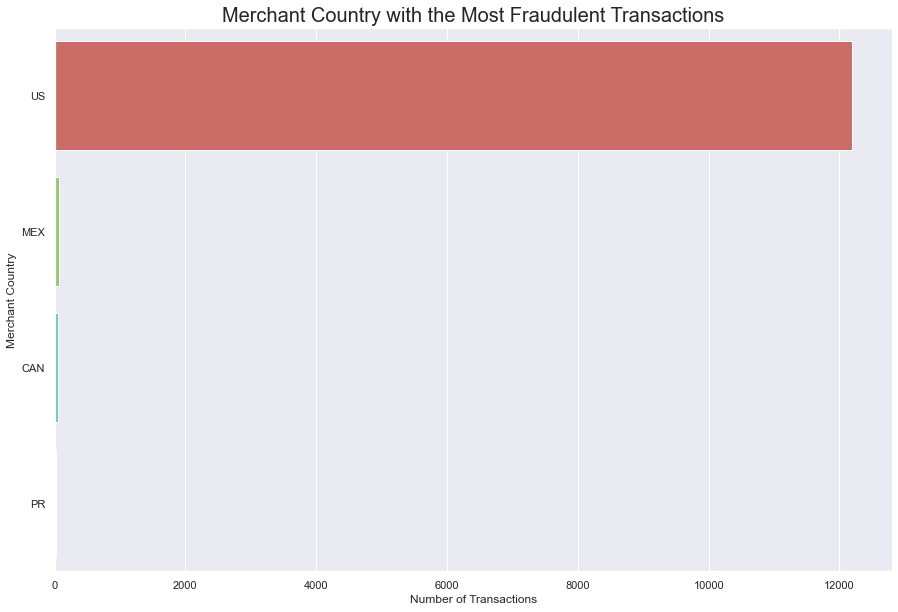

In [15]:
# Look at merchant country with the most fraudulent transactions.
plt.figure(figsize=(15, 10))
mer_cntry = fraud_trans['merchantCountryCode'].value_counts()
sns.barplot(y=list(range(4)), x=mer_cntry.values, orient='h', palette='hls')
plt.yticks(ticks=list(range(4)), labels=mer_cntry.index.tolist())
plt.ylabel('Merchant Country')
plt.xlabel('Number of Transactions')
plt.title('Merchant Country with the Most Fraudulent Transactions', fontsize = 20)

In [16]:
# Sort date for graphing purposes later, and strip year and month from transactionDateTime
sort_df = df.sort_values(by='transactionDateTime')
trans_date = pd.to_datetime(sort_df["transactionDateTime"]).dt.strftime('%Y-%m')
print(trans_date)

640789    2016-01
28946     2016-01
222211    2016-01
470320    2016-01
704106    2016-01
           ...   
472383    2016-12
769872    2016-12
624229    2016-12
280484    2016-12
618382    2016-12
Name: transactionDateTime, Length: 786363, dtype: object


Text(0.5, 1.0, 'Transaction Amount by Date')

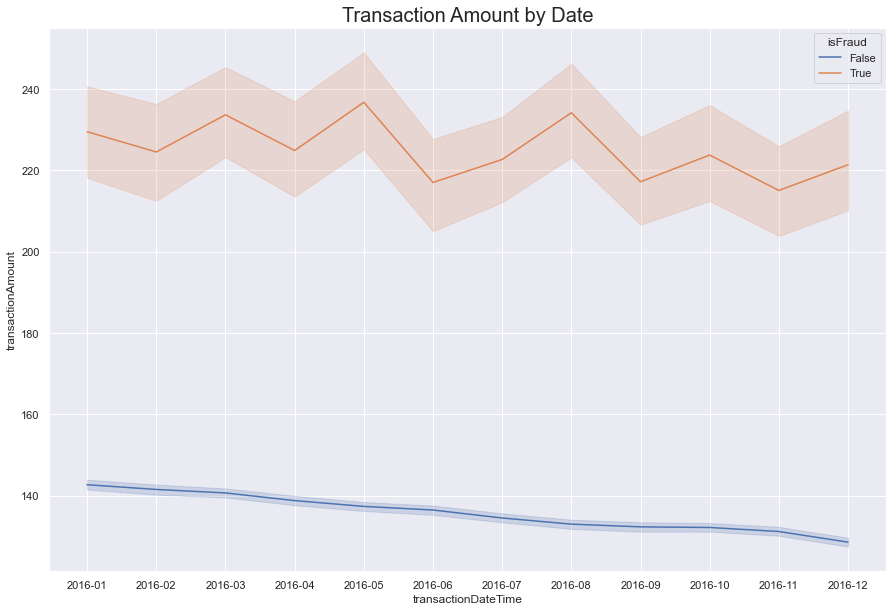

In [17]:
# Time Series plot of Transaction Amount by Date
plt.figure(figsize=(15, 10))
sns.lineplot(x=trans_date, y='transactionAmount', data=sort_df, hue='isFraud', sort=True, markers=True)
plt.title('Transaction Amount by Date', fontsize = 20)

<ipython-input-18-fb9ba72ca748>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


<Figure size 1800x1440 with 0 Axes>

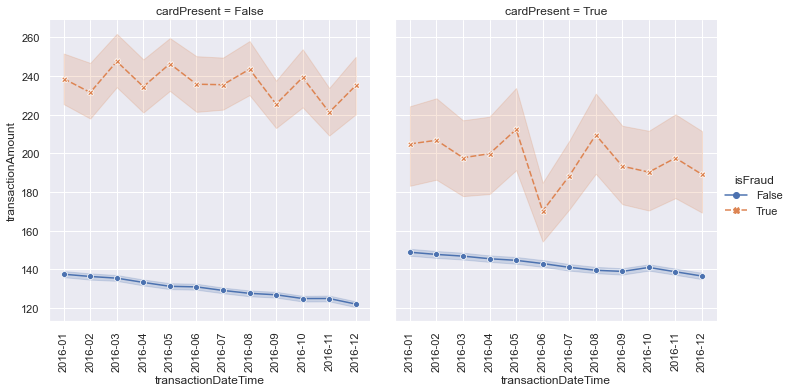

In [18]:
plt.figure(figsize=(25,20))
plot = sns.relplot(data=sort_df, x=trans_date, y='transactionAmount',col="cardPresent", 
            hue="isFraud", style="isFraud", kind="line", markers=True)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Compare Transactions Based on Transaction Type')

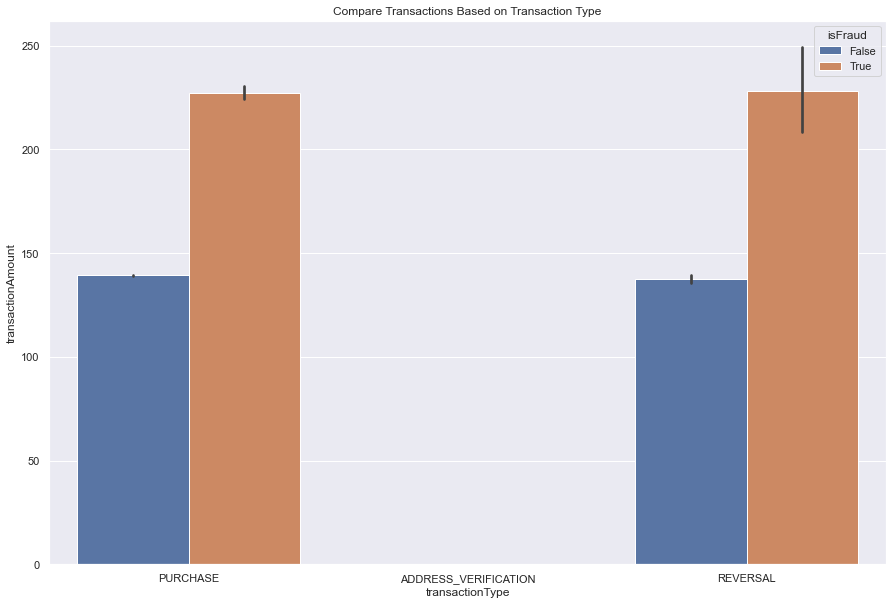

In [19]:
# Compare fraud and authentic transactions based on type of transaction.
plt.figure(figsize=(15,10))
sns.barplot(data=df, y='transactionAmount', x='transactionType', hue='isFraud')
plt.title('Compare Transactions Based on Transaction Type')